# Applied Data Science Capstone Project


## Introduction

   Every year, roughly 1.3 million people die in car accidents worldwide - an average of 3,287 deaths per day. Road traffic crashes cause up to 50 million injuries globally each year. On the other hand, the use of smart cars is increasing each year. 
   Wouldn't it be great if your car would warn you, given the weather and the road conditions about the possibility of you getting into a car accident and how severe it would be, so that you would drive more carefully or even change your travel if you are able to?
   This is what this project is about.

## Business Problem

Our problem is to develop a machine learning model in an effort to reduce the amount of severe car accidents. The model should predict the severity of car accidents, given the current weather, road and visibility conditions. If the
severity predicted is high it should warn the driver to drive more carefully or even change the travel route.

## The Data

 The dataset we will be using is the shared data for Seattle City. 

Let's start by loading our dataset.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
from dython import nominal


In [2]:
#Load the dataset as pandas dataframe
cwd = os.getcwd()
path = cwd + "//Data-Collisions.csv"
df = pd.read_csv(path, low_memory=False)
df.style.hide_index()
df.columns


Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

Let's keep only the columns we are going to use. We also drop some columns that could have been useful, for example INNATTENTIONID, because they have to many values that are NaN

In [3]:
df.drop(['X','Y','OBJECTID','INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'EXCEPTRSNCODE',
         'LOCATION', 'EXCEPTRSNDESC', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
         'INCDATE', 'INCDTTM', 'SDOT_COLCODE', 'SDOT_COLDESC', 'SEVERITYCODE.1', 'JUNCTIONTYPE', 
         'UNDERINFL', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
         'SEGLANEKEY','CROSSWALKKEY', 'HITPARKEDCAR', 'ST_COLDESC','COLLISIONTYPE','SEVERITYDESC',
         'ADDRTYPE', 'INATTENTIONIND'], axis = 1, inplace = True)
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


The Severity code is coded as followed:  
<ol>
    <li>Property Damage Only Collision</li> 
    <li>Injury Collision</li>

In [4]:
df.WEATHER.unique()

array(['Overcast', 'Raining', 'Clear', nan, 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [5]:
df.ROADCOND.unique()

array(['Wet', 'Dry', nan, 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [6]:
df.LIGHTCOND.unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       nan, 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Other', 'Dark - Unknown Lighting'], dtype=object)

As we can see above we have 12 values for the weather condition: 
<ol>
    <li>Clear</li>
    <li>Partly Cloudy</li>
    <li>Overcast</li>
    <li>Raining</li>
    <li>Blowing Sand/Dirt</li>
    <li>Fog/Smog/Smoke</li>
    <li>Severe Crosswind</li>
    <li>Snow</li>
    <li>Sleet/Hail/Freezing Rain</li>
    <li>Unknown</li>
    <li>Other</li>
    <li>NaN</li>
    
</ol> 

We have 10 values for the road condition:
<ol>
    <li>Dry</li>
    <li>Wet</li>
    <li>Standing Water</li>
    <li>Sand/Mud/Dirt</li>
    <li>Snow/Slush</li>
    <li>Ice</li>
    <li>Oil</li>
    <li>Unknown</li>
    <li>Other</li>
    <li>NaN</li>
    
</ol> 

Finnally we have 11 values for the lighting condition:
<ol>
    <li>Daylight</li>
    <li>Dusk</li>
    <li>Dawn</li>
    <li>Dark - Street Lights On</li>
    <li>Dark - Street Lights Off</li>
    <li>Dark - No Street Lights</li>
    <li>Dark - Unknown Lighting</li>
    <li>Unknown</li>
    <li>Other</li>
    <li>NaN</li>
    
</ol> 

Before building our model, we will encode all this values and also decide what we are going to do with the values 'Unknown', 'Other', 'NaN'. However we should get a deeper understanding of our data first.

### Data Visualization

Lets visualize our data to get a deeper understanding of it.

#### Severity of the Accidents 

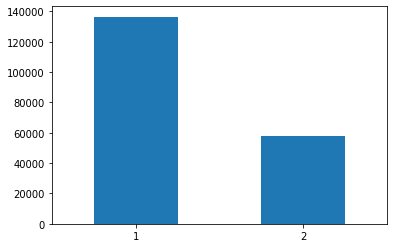

In [7]:
df['SEVERITYCODE'].value_counts().plot.bar(y='SEVERITYCODE', rot = 0)

As we can see from our plot, most of the accidents did not lead to injury. Also, we can see that our data is not balanced, which means we will have to balance it because the severity code will be used as our target variable.

#### The Weather condition

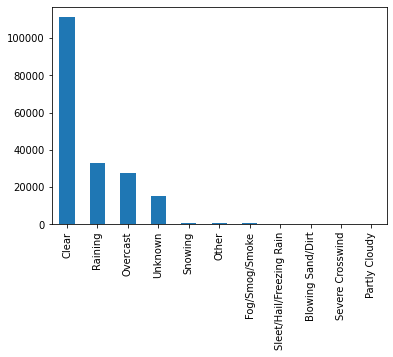

In [8]:
df['WEATHER'].value_counts().plot(kind = 'bar')

#### The Road condition

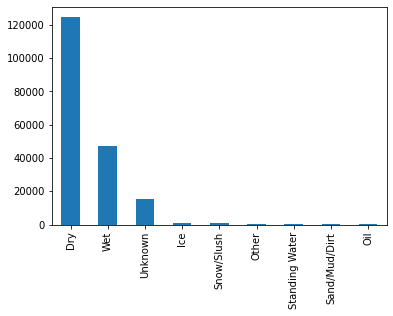

In [9]:
df['ROADCOND'].value_counts().plot(kind = 'bar')

#### The Lightning condition

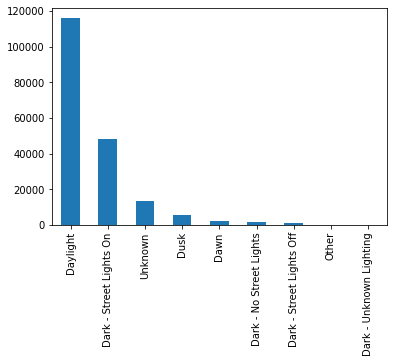

In [10]:
df['LIGHTCOND'].value_counts().plot(kind = 'bar')

Suprisingly, most of the accidents happened on good conditions. We can assume that most people lose their attention or drive carelessly when the conditions are good. When the conditions are ideal our model should warn the drivers to be more careful.

Lets visualize the severe accidents

In [11]:
df_severe = df[df['SEVERITYCODE'] > 1]
df_severe.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
4,2,Raining,Wet,Daylight
7,2,Clear,Dry,Daylight
9,2,Clear,Dry,Daylight
14,2,Clear,Dry,Dark - Street Lights On


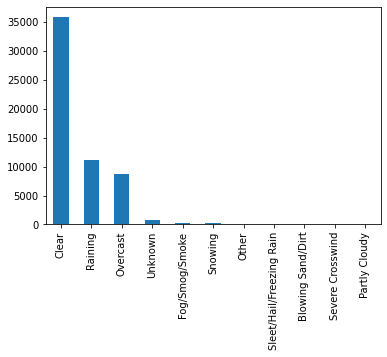

In [12]:
df_severe['WEATHER'].value_counts().plot(kind = 'bar')

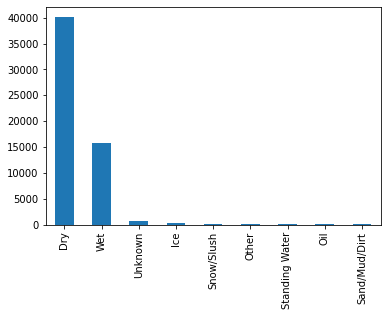

In [13]:
df_severe['ROADCOND'].value_counts().plot(kind = 'bar')

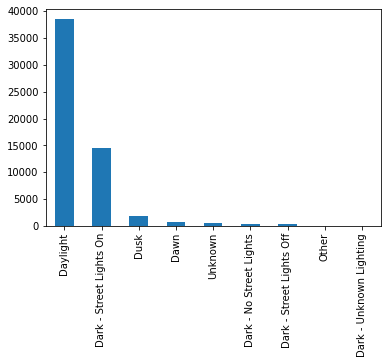

In [14]:
df_severe['LIGHTCOND'].value_counts().plot(kind = 'bar')

As we can see in the plots above, even the severe accidents occured during good conditions.

## Building The Model

Before building our models and testing which one scores the best, we have to prepare our data.

### Data Preprocessing

As we have seen, the values other and unknown are not common on severe accidents. So we will drop every row that includes the values NaN, Unknown and Other

In [15]:
df.replace('Other',np.nan, inplace = True)
df.replace('Unknown',np.nan, inplace = True)

In [16]:
nanvalues = df.isnull().sum().sum()
print("The total NaN Values are: " + str(nanvalues))
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)
nanvalues = df.isnull().sum().sum()
print("After droping the rows with NaN Values: ", str(nanvalues))

The total NaN Values are: 15263
After droping the rows with NaN Values:  0


As stated before we have to balance our dataset.

In [17]:
df['SEVERITYCODE'].value_counts()

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

In [18]:
df = (df.groupby('SEVERITYCODE', as_index=False)
        .apply(lambda x: x.sample(n=55683))
        .reset_index(drop=True))
df['SEVERITYCODE'].value_counts()

2    57052
1    57052
Name: SEVERITYCODE, dtype: int64

Now we have a balanced dataset.

Our next job is to encode our independent variables.

In [19]:
df['WEATHER'].replace(to_replace=['Overcast', 'Raining', 'Clear', 'Snowing', 'Fog/Smog/Smoke',
                                  'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind',
                                  'Partly Cloudy', 'Unknown'], 
                      value=[3, 4, 1, 6, 5, 7, 8, 9, 2, 10], inplace=True)
df['ROADCOND'].replace(to_replace=['Wet', 'Dry', 'Snow/Slush', 'Ice', 'Sand/Mud/Dirt', 
                                    'Standing Water', 'Oil', 'Unknown'], 
                      value=[2, 1, 4, 5, 3, 6, 7, 8], inplace=True)
df['LIGHTCOND'].replace(to_replace=['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights', 'Dusk',
                                    'Dawn', 'Dark - Street Lights Off', 'Dark - Unknown Lighting', 'Unknown'], 
                      value=[1, 2, 5, 3, 4, 6, 7, 8], inplace=True)      
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,1,1,1,1
1,1,3,1,1
2,1,1,1,1
3,1,1,1,1
4,1,10,8,1


In [20]:
df.dtypes

SEVERITYCODE    int64
WEATHER         int64
ROADCOND        int64
LIGHTCOND       int64
dtype: object

Now our dataset is ready

### Train/Test Data

Before trying our models we will split our dataset to a train and test set

In [21]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['WEATHER', 'ROADCOND', 'LIGHTCOND']])
y = np.asarray(df['SEVERITYCODE'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (79872, 3) (79872,)
Test set: (34232, 3) (34232,)


Now we are all set up to build our models. We are going to use classification algorithms, as our independent variable is not continous and we have a labeled dataset.

### Logistic Regression

Lets start with building a LR model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as pyplt
import seaborn as sns

LR = LogisticRegression(solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(solver='liblinear')

Now we can predict using our test set and plot our result:

In [23]:
lr_pred = LR.predict(X_test)
lr_prob = LR.predict_proba(X_test)

Text(0.5, 1.0, 'LOGISTIC REGRESSION \n Accuracy Score: 0.5540430007010984')

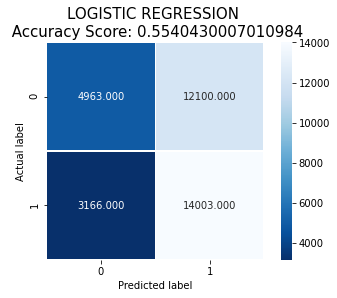

In [24]:
cm = metrics.confusion_matrix(y_test, lr_pred)
score = metrics.accuracy_score(y_test, lr_pred)
plt.figure.Figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
pyplt.ylabel('Actual label');
pyplt.xlabel('Predicted label');
all_sample_title = 'LOGISTIC REGRESSION \n Accuracy Score: {0}'.format(score)
pyplt.title(all_sample_title, size = 15)

### Decision Tree

Next, we are building a Decision Tree Model

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Now we can predict and plot our result:

In [26]:
dt_pred = dt.predict(X_test)
dt_prob = dt.predict_proba(X_test)

Text(0.5, 1.0, 'DECISION TREE \n Accuracy Score: 0.5590967515774714')

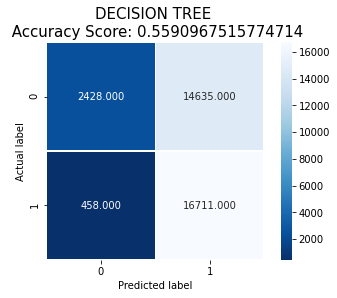

In [27]:
cm = metrics.confusion_matrix(y_test, dt_pred)
score = metrics.accuracy_score(y_test, dt_pred)
plt.figure.Figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
pyplt.ylabel('Actual label');
pyplt.xlabel('Predicted label');
all_sample_title = 'DECISION TREE \n Accuracy Score: {0}'.format(score)
pyplt.title(all_sample_title, size = 15)

### SVM

Now we will try a SVM model

In [28]:
from sklearn import svm
SWM = svm.SVC(kernel='rbf')
SWM.fit(X_train, y_train) 

SVC()

Predicting and visualizing the results:

In [29]:
svm_pred = SWM.predict(X_test)

Text(0.5, 1.0, 'SVM \n Accuracy Score: 0.5600023369946249')

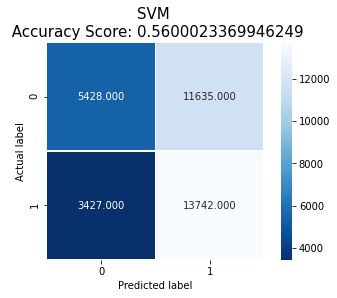

In [30]:
cm = metrics.confusion_matrix(y_test, svm_pred)
score = metrics.accuracy_score(y_test, svm_pred)

plt.figure.Figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
pyplt.ylabel('Actual label');
pyplt.xlabel('Predicted label');
all_sample_title = 'SVM \n Accuracy Score: {0}'.format(score)
pyplt.title(all_sample_title, size = 15)

### K-Nearest Neighbors

Finally we will build a kNN model. First we find the best k for our model

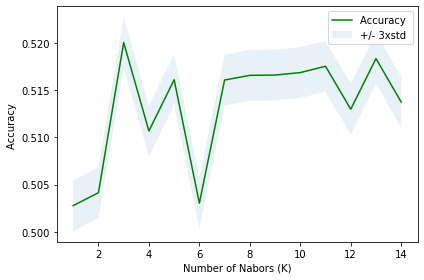

The best accuracy was with 0.5200689413414349 with k= 3


In [31]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

pyplt.plot(range(1,Ks),mean_acc,'g')
pyplt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
pyplt.legend(('Accuracy ', '+/- 3xstd'))
pyplt.ylabel('Accuracy ')
pyplt.xlabel('Number of Nabors (K)')
pyplt.tight_layout()
pyplt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

We build our model with the best k we found above

In [33]:
k = mean_acc.argmax()+1 
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

We predict and plot our results

In [34]:
knn_pred = knn.predict(X_test)

Text(0.5, 1.0, 'kNN \n Accuracy Score: 0.5200689413414349')

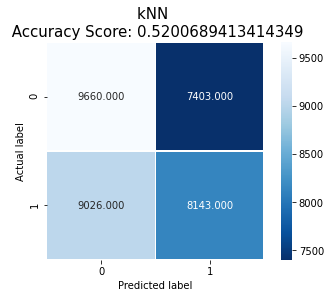

In [35]:
cm = metrics.confusion_matrix(y_test, knn_pred)
score = metrics.accuracy_score(y_test, knn_pred)

plt.figure.Figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
pyplt.ylabel('Actual label');
pyplt.xlabel('Predicted label');
all_sample_title = 'kNN \n Accuracy Score: {0}'.format(score)
pyplt.title(all_sample_title, size = 15)